## Autoencoder, the beginning!

This notebook gives an overview of the actual encoding and decoding visual piece at the end with explanation to show you what's going on and help you understand the material!

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
from scipy.stats import norm 
import torch 
import torch.nn as nn 
from torchvision import datasets, transforms 

from models.Autoencoder import Autoencoder

In [2]:
batch_size = 4

test_ds = datasets.MNIST(root='./data/', train=False, transform=transforms.ToTensor(), download=True)
test_dl = torch.utils.data.DataLoader(dataset=test_ds, batch_size=batch_size, shuffle=False, drop_last=True)

In [3]:
device = torch.device('cuda') if torch.cuda.is_available() else 'cpu'

model = Autoencoder(test_ds[0][0][None], in_c=1, enc_out_c=[32, 64, 64, 64],
                    enc_ks=[3, 3, 3, 3], enc_pads=[1, 1, 0, 1], enc_strides=[1, 2, 2, 1],
                    dec_out_c=[64, 64, 32, 1], dec_ks=[3, 3, 3, 3], dec_strides=[1, 2, 2, 1],
                    dec_pads=[1, 0, 1, 1], dec_op_pads=[0, 1, 1, 0], z_dim=2)

model.to(device)

model.load_state_dict(torch.load('models/state_dicts/03_01.pth'))  # 학습된 파라미터 불러오기 
model.eval()

Autoencoder(
  (enc_conv_layers): Sequential(
    (0): Sequential(
      (0): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): LeakyReLU(negative_slope=0.01)
      (2): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (3): Dropout(p=0.25, inplace=False)
    )
    (1): Sequential(
      (0): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
      (1): LeakyReLU(negative_slope=0.01)
      (2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (3): Dropout(p=0.25, inplace=False)
    )
    (2): Sequential(
      (0): Conv2d(64, 64, kernel_size=(3, 3), stride=(2, 2))
      (1): LeakyReLU(negative_slope=0.01)
      (2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (3): Dropout(p=0.25, inplace=False)
    )
    (3): Sequential(
      (0): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): LeakyReLU(negative_slope=

In [4]:
torch.set_grad_enabled(False)

In [5]:
examples = next(iter(test_dl))

In [6]:
examples[0][0].shape, examples[1][0], len(examples), len(examples[0]), len(examples[1])

(torch.Size([1, 28, 28]), tensor(7), 2, 4, 4)

In [7]:
x, y = examples[0], examples[1]
x.shape, y.shape

(torch.Size([4, 1, 28, 28]), torch.Size([4]))

In [8]:
encoder = model.enc_conv_layers
decoder = model.dec_conv_layers

In [9]:
z_points = encoder(examples[0].to(device))
reconst_imgs = decoder(z_points)

fig = plt.figure(figsize=(15, 3))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

<Figure size 1080x216 with 0 Axes>

In [10]:
for i in range(batch_size):
    img = x[i].squeeze()
    ax = fig.add_subplot(2, batch_size, i+1)
    ax.axis('off')
    ax.text(0.5, -0.35, str(np.round(z_points[i].cpu(), 1)), fontsize=10, ha='center', transform=ax.transAxes)   
    ax.imshow(img, cmap='gray_r')

for i in range(batch_size):
    img = reconst_imgs[i].cpu().squeeze()
    ax = fig.add_subplot(2, batch_size, i + batch_size + 1)
    ax.axis('off')
    ax.imshow(img, cmap='gray_r')

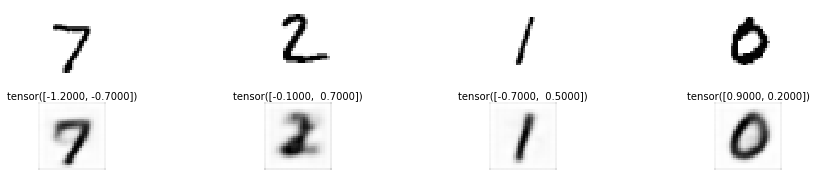

In [11]:
fig

### Mr N. Coder's wall

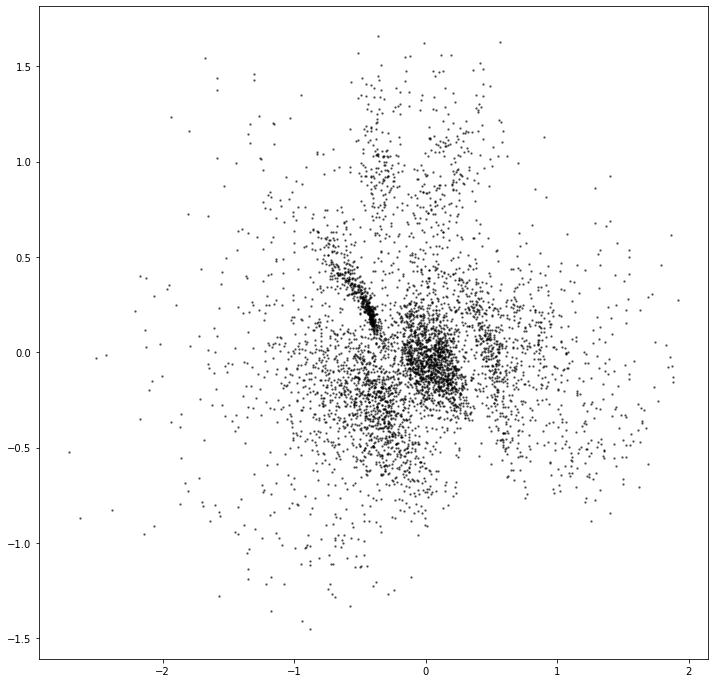

In [12]:
test_dl = torch.utils.data.DataLoader(dataset=test_ds, batch_size=5000, shuffle=False, drop_last=True)
examples = next(iter(test_dl))
grid_size = 15
figsize = 12

x, y = examples[0], examples[1]
z_points = encoder(x.to(device)).cpu()

plt.figure(figsize=(figsize, figsize))
plt.scatter(z_points[:, 0] , z_points[:, 1], c='black', alpha=0.5, s=2)
plt.show()

* Let's see how well our Autoencoder did, by seeing if it decodes the correct numbers! 
* Pay attention to the color map. 
* It represents the colors of the number the encoded space should represent once it's been decoded

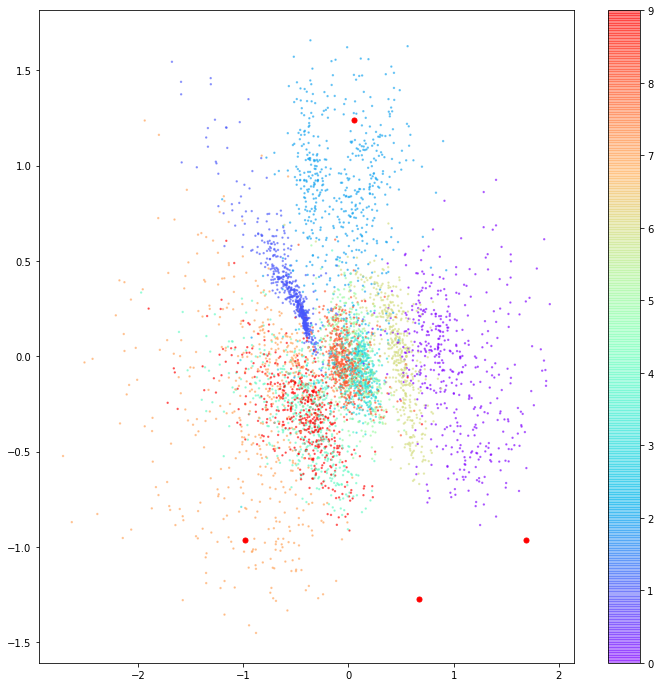

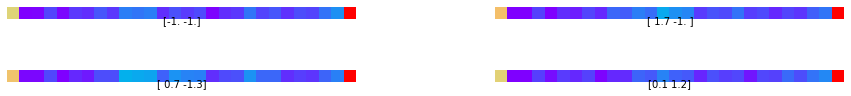

In [13]:
figsize = 12
np.random.seed(42)

min_x = min(z_points[:, 0])
max_x = max(z_points[:, 0])
min_y = min(z_points[:, 1])
max_y = max(z_points[:, 1])

examples = next(iter(test_dl))
x, y = examples[0], examples[1]
z_points = encoder(x.to(device)).cpu()

plt.figure(figsize=(figsize, figsize))
plt.scatter(z_points[:, 0] , z_points[:, 1], cmap='rainbow', c=y, alpha=0.5, s=2)
plt.colorbar()

grid_size = 2
grid_depth = 2
figsize = 15

x = np.random.uniform(min_x,max_x, size = grid_size * grid_depth)
y = np.random.uniform(min_y,max_y, size = grid_size * grid_depth)
z_grid = np.array(list(zip(x, y)))
reconst = decoder(torch.from_numpy(z_grid).float().to(device)).cpu()

plt.scatter(z_grid[:, 0] , z_grid[:, 1], c = 'red', alpha=1, s=25)
plt.show()

fig = plt.figure(figsize=(figsize, grid_depth))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i in range(grid_size * grid_depth):
    ax = fig.add_subplot(grid_depth, grid_size, i+1)
    ax.axis('off')
    ax.text(0.5, -0.35, str(np.round(z_grid[i],1)), fontsize=10, ha='center', transform=ax.transAxes)    
    ax.imshow(reconst[i, :,:,0], cmap = 'rainbow')

* It seems to me like [-.7, -1.5] should be decoded to 7 because it lies within the orange ranges
* [1.3, -1.5] and [0.5, -1.9] should be decoded to 0 because it lies mostly within the purple ranges
* [0.1, 1.4] should be decoded to 2, because it lies within the green-blue ranges

이 결과는 학습 할 때마다 조금씩 바뀌는 것 같다.

### Let's see if it does! 

[-0.7 -1.5]		   [ 1.3 -1.5]		   [ 0.5 -1.9]		   [0.1 1.4]		   

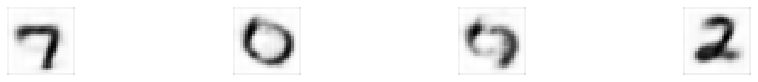

In [14]:
z_points = torch.tensor([[-.7, -1.5], [1.3, -1.5], [.5, -1.9], [0.1, 1.4]])
reconst_imgs = decoder(z_points.to(device))

fig = plt.figure(figsize=(15, 3))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for z_point in z_points:
    print(z_point.numpy(), end='\t\t   ')
    
for i in range(4):
    img = reconst_imgs[i].cpu().squeeze()
    ax = fig.add_subplot(2, batch_size, i + batch_size + 1)
    ax.axis('off')
    ax.imshow(img, cmap='gray_r')

### And indeed they do! However, please pay attention to the [0.5, -1.9] because we will come back to it in 03_03_autoencoder_analysis. Notice that it doesn't look all that well of a 7. Just a sneakpeek, this is because it is kind of an outlier from the rest of the 7s and others